FileUpload(value={}, accept='.png, .jpg, .jpeg', description='Upload')

Jumlah pixel hitam (atas): 159507
Jumlah pixel putih (bawah): 159986


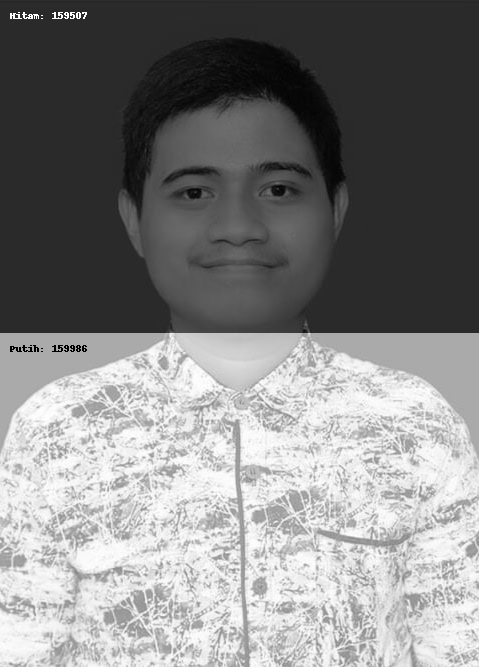

In [1]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, HTML
import io
import ipywidgets as widgets
from IPython.display import display

# Fungsi untuk membuka gambar dan mengubahnya menjadi setengah hitam dan setengah putih
def buka_gambar(b):
    # Menampilkan tombol "Upload Gambar"
    upload_button = widgets.FileUpload(accept='.png, .jpg, .jpeg')
    display(upload_button)

    # Menangani pengunggahan gambar
    def handle_upload(change):
        uploaded_image = upload_button.value[next(iter(upload_button.value))]

        image = Image.open(io.BytesIO(uploaded_image['content']))

        if image.mode != 'L':
            image = image.convert('L')

        width, height = image.size

        setengah_atas = height // 2

        # Mengubah setengah atas gambar dengan intensitas rendah (hitam lebih ringan)
        for y in range(setengah_atas):
            for x in range(width):
                pixel_value = image.getpixel((x, y))
                image.putpixel((x, y), pixel_value // 2)  # Mengurangi intensitas warna

        # Mengubah setengah bawah gambar dengan intensitas tinggi (putih lebih ringan)
        for y in range(setengah_atas, height):
            for x in range(width):
                pixel_value = image.getpixel((x, y))
                image.putpixel((x, y), 255 - (255 - pixel_value) // 2)  # Meningkatkan intensitas warna

        # Menampilkan jumlah pixel hitam dan putih
        hitam = setengah_atas * width
        putih = (height - setengah_atas) * width
        print(f"Jumlah pixel hitam (atas): {hitam}")
        print(f"Jumlah pixel putih (bawah): {putih}")

        # Menambahkan angka pixel di atas gambar
        draw = ImageDraw.Draw(image)
        font = ImageFont.load_default()  # Font default
        draw.text((10, 10), f"Hitam: {hitam}", fill=255, font=font)
        draw.text((10, height // 2 + 10), f"Putih: {putih}", fill=0, font=font)

        # Menyimpan dan menampilkan gambar yang sudah diubah
        display(image)

    upload_button.observe(handle_upload, names='value')

# Panggil fungsi untuk membuka gambar
buka_gambar(None)
